In [1]:
# pip installs
!pip install lightgbm

In [2]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LightGBM
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [3]:
# Load file
df = pd.read_csv("all_merged_sw.csv",
                 usecols=['post_id', 'date', 'num_comments', 'score', 'total_awards',
                          'author_commentkarma', 'compound_score', 'author_id', 'author_name',
                          'ticker', 'post_type', 'adjclose_2_Y',
                          'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
                          'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                          'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
                          'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
                          'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y'])

df

,post_id,date,num_comments,score,total_awards,author_commentkarma,compound_score,author_id,author_name,ticker,...,adjclose_12_Y,adjclose_13_Y,adjclose_14_Y,adjclose_15_Y,adjclose_16_Y,adjclose_17_Y,adjclose_18_Y,adjclose_19_Y,adjclose_20_Y,adjclose_21_Y
0,ed1i6xt,2019-01-01,2,9,0.0,1855.0,0.2023,a36tf,gundeck925,CONE,...,48.734329,49.016304,48.236179,46.995499,47.221077,46.967300,49.223080,49.345276,50.144196,50.943123
1,ed0rsq9,2019-01-01,1,3,0.0,8101.0,0.4588,54sdn,turbotoast,CACC,...,421.739990,429.119995,424.959991,420.950012,405.570007,409.929993,411.890015,408.670013,414.369995,398.019989
2,ed149cc,2019-01-01,2,6,0.0,234162.0,-0.5106,6lvmmbl,Shmokesshweed,WSBC,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
3,ed0rg2j,2019-01-01,9,6,0.0,744.0,0.3612,2dk1wq99,nightman_123,WSBC,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
4,abjmvm,2019-01-01,34,10,0.0,744.0,-0.8442,2dk1wq99,nightman_123,WSBC,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940780,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,ADES,...,5.420000,5.450000,5.330000,5.380000,5.440000,5.500000,5.250000,5.190000,5.070000,5.120000
940781,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,JAN,...,5.530000,5.800000,5.650000,5.520000,5.230000,6.450000,9.520000,12.990000,9.010000,9.400000
940782,ghmynsf,2020-12-31,1,10,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,FEYE,...,22.190001,22.400000,22.600000,22.639999,22.100000,21.660000,21.360001,21.150000,21.000000,21.590000
940783,ghmiiu6,2020-12-31,0,4,0.0,22288.0,-0.3875,bgruy,DeadSol,WSBC,...,31.354565,31.205917,30.700518,31.364473,31.255468,30.720339,28.926668,29.550983,28.738380,29.313148


In [4]:
# Print the colum names
df.columns.values

array(['post_id', 'date', 'num_comments', 'score', 'total_awards',
       'author_commentkarma', 'compound_score', 'author_id',
       'author_name', 'ticker', 'post_type', 'adjclose_2_Y',
       'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
       'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
       'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
       'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
       'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y'], dtype=object)

In [5]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [6]:
# Get the X-variable columns
df_X = df[['num_comments', 'score', 'total_awards', 'author_commentkarma',
           'compound_score']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 2.00000e+00  9.00000e+00  0.00000e+00  1.85500e+03  2.02300e-01]
 [ 1.00000e+00  3.00000e+00  0.00000e+00  8.10100e+03  4.58800e-01]
 [ 2.00000e+00  6.00000e+00  0.00000e+00  2.34162e+05 -5.10600e-01]
 ...
 [ 1.00000e+00  2.20000e+01  0.00000e+00  6.72900e+03  3.61200e-01]
 [ 5.10000e+01  1.15000e+02  3.00000e+00  1.66000e+02  9.92300e-01]
 [ 5.10000e+01  1.15000e+02  3.00000e+00  1.66000e+02  9.92300e-01]]
[[ 0.00000e+00  8.00000e+00  0.00000e+00  2.10444e+05  6.77100e-01]
 [ 1.00000e+00  1.00000e+01  0.00000e+00  5.63300e+03 -7.72000e-02]
 [ 0.00000e+00  3.00000e+00  0.00000e+00  5.22900e+03  2.73200e-01]
 ...
 [ 1.00000e+00  1.00000e+01  0.00000e+00  4.43100e+03  4.93900e-01]
 [ 0.00000e+00  4.00000e+00  0.00000e+00  2.22880e+04 -3.87500e-01]
 [ 1.00000e+00  3.00000e+00  0.00000e+00  5.76000e+02 -5.92700e-01]]
[[ 46.61013794  47.9824028   48.60273743 ...   5.           5.
   21.        ]
 [395.02999878 408.26000977 406.55999756 ...   8.          13.
   13.        ]
 [ 33.85371017

In [7]:
# Initialize Model
model = LGBMRegressor(n_estimators=1000)

# Wrap Model for Multiple Outputs
wrapper = MultiOutputRegressor(model).fit(X_train, y_train)

# Wrapper Prediction
ypred = wrapper.predict(X_test)

In [8]:
# Evaluate RMSE
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1])

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1])

The RMSE for adjClose_2_Y =  493.432501552401
The RMSE for adjClose_3_Y =  493.55603702778575
The RMSE for adjClose_4_Y =  494.01632371446067
The RMSE for adjClose_5_Y =  494.4787862586396
The RMSE for adjClose_6_Y =  494.75429768990125
The RMSE for adjClose_7_Y =  493.6809146912609
The RMSE for adjClose_8_Y =  494.1843122907028
The RMSE for adjClose_9_Y =  493.5824113419161
The RMSE for adjClose_10_Y =  493.6603615214454
The RMSE for adjClose_11_Y =  493.97268414888464
The RMSE for adjClose_12_Y =  494.07369475863624
The RMSE for adjClose_13_Y =  494.89918842721335
The RMSE for adjClose_14_Y =  495.00283548692397
The RMSE for adjClose_15_Y =  497.31944136292276
The RMSE for adjClose_16_Y =  499.3428491422048
The RMSE for adjClose_17_Y =  499.85067651404677
The RMSE for adjClose_18_Y =  501.0834834098602
The RMSE for adjClose_19_Y =  501.80160948989663
The RMSE for adjClose_20_Y =  502.6142430597276
The RMSE for adjClose_21_Y =  502.59085792429556
The RMSE for 5day_min =  1.54873770847

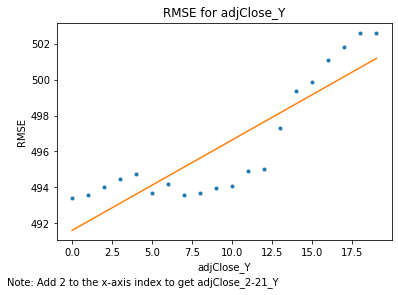

In [9]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [10]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in mae
for i in range(1, len(mae)+1):

    # Print the MAE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the MAE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the MAE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  195.40190415075386
The MAE for adjClose_3_Y =  195.49526890066474
The MAE for adjClose_4_Y =  195.90723074380566
The MAE for adjClose_5_Y =  196.2603189482929
The MAE for adjClose_6_Y =  196.84612991316718
The MAE for adjClose_7_Y =  196.8697110982565
The MAE for adjClose_8_Y =  197.34874215117387
The MAE for adjClose_9_Y =  197.78902790045865
The MAE for adjClose_10_Y =  198.01435271548002
The MAE for adjClose_11_Y =  198.30676391585914
The MAE for adjClose_12_Y =  198.70739182790098
The MAE for adjClose_13_Y =  199.42297808828772
The MAE for adjClose_14_Y =  199.85050241712392
The MAE for adjClose_15_Y =  200.71644852472377
The MAE for adjClose_16_Y =  201.4528336269469
The MAE for adjClose_17_Y =  201.82690176256045
The MAE for adjClose_18_Y =  202.5623803017886
The MAE for adjClose_19_Y =  203.13954125172538
The MAE for adjClose_20_Y =  203.8400038467926
The MAE for adjClose_21_Y =  204.2579635786781
The MAE for 5day_min =  1.3832987503191572
The MAE for

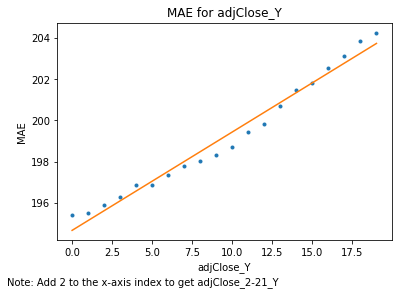

In [11]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('MAE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()